<h1><center> WHAT LOVE IS </center></h1>

Authors:

- __Analysis__: David Montaño Castro (Actuary, UNAM)
- __Survey__: Vera (Psychology, UNAM)

# Libraries

In [160]:
"""Basic"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


"""Stats"""

import scipy.stats as stats
from scipy.stats import f_oneway


"""ML"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


"""Settings"""

pd.set_option('display.max_columns', 500)
plt.rcParams["figure.figsize"] = (15,12)
pd.options.mode.chained_assignment = None
plt.style.use('fivethirtyeight')

# Functions

In [2]:
def df_lower(df):
    for name in df.select_dtypes("object").columns:
        df[name] = df[name].str.lower()
    
    #return df
    
def df_strip(df):
    for name in df.select_dtypes(["object"]).columns:
        df[name] = df[name].str.strip()

    #return df
    

# Source: https://micro.recursospython.com/recursos/como-quitar-tildes-de-una-cadena.html
def df_noaccents(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s



def info_chi_(model):
    print("Chi-statistic:", model[0],2*"\n","P-value",round(model[1],4),2*"\n","Df",model[2],2*"\n","Expected values", model[3],2*"\n")
    
def info_chi(c1, c2):
    tb1 = pd.crosstab(c1, c2).rename(columns = {1:"Strongly Disagree",2:"Disagree",3:"Neutral",4:"Agree",5:"Strongly Agree"})
    display(tb1)
    
    chi1 = stats.chi2_contingency(tb1.values)
    V = np.sqrt(chi1[0]/(sum(sum(tb1.values))*(min(tb1.shape)-1)))
    
    info_chi_(chi1)
    print("Crammer's V:",V)
    
    
    

# Importing data

In [3]:
data = pd.read_csv("whats_love.csv")

df = data.copy() # The one we are going to be working with.


# General information

The following dataframe is comprised of 5 linkert scale columns and the rest are string columns type. These last columns may contain more than one single word to describe whichever the question was. Since some of these questions were opened and free-to-answer questions we must carry out some EDA and ETL techniques to lead to better results and conclutions.  

As we are going to be working with linkert scales, we suggest to read the [following paper](https://www.st-andrews.ac.uk/media/ceed/students/mathssupport/Likert.pdf) to take into account different statistical methods to analyse the data comprised in this article. We have used the standart Linkert scale prototype (5 scales).

Questions are enumerated for us: in total we have 17 questions to analyse whereas 5 of them provide persons' general information, such as: Age, Sex, Place of living and Marital status. `Marca temporal` contains the date when the register was recorded on the database. 

In [4]:
df.iloc[:,3:].head(1)

,Estado civil,"¿A qué estado de la República Mexicana perteneces? (sin abreviaturas) Ejemplo: Estado de México, Oaxaca, Ciudad de México, Puebla",1. El amor para mi es:,2. La primera palabra en la que pienso cuando escucho a alguien hablar sobre el amor es:,3.. Pienso que el amor,4. Selecciona una de las opciones con la que estés de acuerdo,5. ¿Cuál crees que debería ser una de las principales características del amor?,6. Creo que el amor,7. Los componentes del amor son,8. Selecciona los tipos de amor conozcas,9. Creo que los seres humanos amamos porque,10. Un amor equilibrado debería ser o tener,"11. En cuanto al amor de pareja, prefiero que mi tipo de pareja sea:",12. Cuando amo yo suelo ser,"13. El amor filial es igual, es decir, padre y madre aman de la misma forma",14. El amor lo puede todo,15. Todo se perdona por amor,16. Existen las medias naranjas o almas gemelas,17. El amor no es igual a una relación de pareja
0,Soltero (a),Veracruz,"Algo incondicional, algo muy valioso y muy her...","Parejas, sentimientos, felicidad",Nos permite el acercamiento y vínculo entre pe...,El amor propio significa admirar mis cualidade...,"Respeto, honestidad y la confianza",Sobrepasa cualquier explicación racional y fís...,"Pasión, compromiso e intimidad",Amor romántico;Amor consumado;Amor fraternal;E...,"Es algo que nos une a todos, independientement...","Un equilibrio en tanto a dar como recibir, sin...","Comprensible, cariñosa, amable",Muy romántico y cariñoso,3,4,1,4,4


## Column types

In [5]:
df.dtypes.value_counts()

object    17
int64      5
dtype: int64

## NaN and Null values
There is no NaN or Null values within the enrire dataframe. 

In [6]:
df.isna().sum().sum()

0

## General description
People have correctly specified the linkert scale answers ranging from 1 to 5 each of them. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"13. El amor filial es igual, es decir, padre y madre aman de la misma forma",226.0,2.778761,1.283983,1.0,2.0,3.0,4.0,5.0
14. El amor lo puede todo,226.0,2.402655,1.320536,1.0,1.0,2.0,3.0,5.0
15. Todo se perdona por amor,226.0,1.676991,1.114391,1.0,1.0,1.0,2.0,5.0
16. Existen las medias naranjas o almas gemelas,226.0,2.526549,1.340548,1.0,1.0,3.0,3.0,5.0
17. El amor no es igual a una relación de pareja,226.0,3.995575,1.290987,1.0,3.0,5.0,5.0,5.0


# Prior to analysis...
Working with texts is a hard task. To make it easier, as good practice we are to implement some useful techniques in order to get better results.

## Dropping non-informative columns

In [8]:
df.drop(columns = ["Marca temporal"], inplace = True)

## Dropping possible duplicate rows

In [9]:
df.drop_duplicates(inplace = True)

## Converting strings to lower case

In [10]:
df_lower(df)

## Stripping strings

In [11]:
df_strip(df)

## No accents 

In [12]:
for name in df.select_dtypes("object").columns:
    df[name] = df[name].apply(df_noaccents)

# Data Wrangling Fase 1
Prior to start the statistical analisys, we requiere to manipulate and adapt some columns to get the information as needed. In Fase 1 we will only face issues related to data's basic structure: adjust suitable data type, proofread gramatical errors, count how many unique values we have in each column, etc. It is possible that while revising every column we drop some that might be considered as non-informative according to our personal criteria.  

## Age 

We encounter literal numbers and some of them include "años" as part of the answer. Since only 5 unique values have to be modified, we can replace those values by using _replace_ function. Afterwards, we need to change the column data type to "integer".

In [13]:
df["¿Qué edad tienes? (escribe tu respuesta en números)"].unique()

array(['22', '55', '20', '17', '15', '40', '38', '14', '16', '21', '19',
       '24', '32', '18', '23', '27', '26', '50', '29', '37', '28 años',
       '25', 'veintidos', '33', '35', '43', '19 años', '49', '56', '65',
       '51', '66', '57', '20 años', '28', '53', '30', '54', 'veintiuno',
       '31', '18 años', '180'], dtype=object)

In [14]:
df["¿Qué edad tienes? (escribe tu respuesta en números)"] = df["¿Qué edad tienes? (escribe tu respuesta en números)"].replace({"28 años":"28","veintidos":"22","19 años":"19","20 años":"20","veintiuno":"21","18 años":"18","180":"18"}).astype("int64")

## Sex

In [15]:
df["¿Cuál es tu sexo biológico?"].unique()

array(['hombre', 'mujer'], dtype=object)

## Marital Status

In [16]:
df["Estado civil"].unique()

array(['soltero (a)', 'divorciado (a)', 'en una relacion', 'viudo (a)'],
      dtype=object)

## Place of living (drop)

We don't consider this columns as informative. 

In [17]:
df["¿A qué estado de la República Mexicana perteneces? (sin abreviaturas) Ejemplo: Estado de México, Oaxaca, Ciudad de México, Puebla"].unique()

array(['veracruz', 'estado de mexico', 'ciudad de mexico',
       'xalapa veracruz mexico', 'estado de veracruz, xalapa', 'cdmx',
       'guerrero', 'hidalgo', 'queretaro', 'saltillo', 'puebla',
       'cuidad de mexico', 'yucatan', 'colima', 'quintana roo',
       'chihuahua', 'michoacan', 'guanajuato', 'san luis potosi',
       'jalisco', 'morelos', 'tlaxcala', 'estado dw mexico',
       'california (eeuu)', 'estado de veracruz, ciudad de xalapa',
       'nuevo leon', 'xalapa, veracruz'], dtype=object)

In [18]:
df.drop(columns = ["¿A qué estado de la República Mexicana perteneces? (sin abreviaturas) Ejemplo: Estado de México, Oaxaca, Ciudad de México, Puebla"], inplace = True)

## Love for me is... (Opened, long answer)

In [19]:
df["1. El amor para mi es:"].nunique()

217

## First word that I relate to when I hear someone else's opinion about love is... (Opened, short answer that might have more than one word)

In [20]:
df["2. La primera palabra en la que pienso cuando escucho a alguien hablar sobre el amor es: "].nunique()

147

## I think love...(multiple option 4, multiple words)

In [21]:
df["3.. Pienso que el amor"].nunique()

4

## Select one of the next statements with wich you agree (__self-love__ multiple option 4, many words)

In [22]:
df["4. Selecciona una de las opciones con la que estés de acuerdo"].nunique()

4

## In your opinion, which trait should be one of the most important love-wise? (Opened, short answer that might have more than one word)

In [23]:
df["5. ¿Cuál crees que debería ser una de las principales características del amor?"].nunique()

175

## I believe love... (Multiple option 4, many words)

In [24]:
df["6. Creo que el amor"].nunique()

4

## Components of love are... (Multiple option, people can submit their own option, many words)

In [25]:
df["7. Los componentes del amor son"].nunique()

43

## Select the type of love you know (Multiple option, selectting more than one option is valid, separeted by semi-colons ; )

In [26]:
df["8. Selecciona los tipos de amor conozcas"].nunique()

117

## Humankind can love because... (Opened, long answer)

In [27]:
df["9. Creo que los seres humanos amamos porque"].nunique()

216

## Harmonious love shod be/have...

In [28]:
df["10. Un amor equilibrado debería ser o tener"].nunique()

201

## Regarding romantic love, I prefer my couple to be...  (Opened, long answer)

In [29]:
df["11. En cuanto al amor de pareja, prefiero que mi tipo de pareja sea:"].nunique()

210

## When I love I use to be... (Opened, short answer that might have many words)

In [30]:
df["12. Cuando amo yo suelo ser "].nunique()

200

## Mothers love as much as fathers do (Likert scale)

In [31]:
df["13. El amor filial es igual, es decir, padre y madre aman de la misma forma "].value_counts()

3    63
2    49
1    47
4    41
5    26
Name: 13. El amor filial es igual, es decir, padre y madre aman de la misma forma , dtype: int64

## Love conquers all (Likert scale)

In [32]:
df["14. El amor lo puede todo"].value_counts()

1    78
3    50
2    49
4    28
5    21
Name: 14. El amor lo puede todo, dtype: int64

## Love forgives everything (Likert Scale)

In [33]:
df["15. Todo se perdona por amor"].value_counts()

1    144
2     42
3     22
5     13
4      5
Name: 15. Todo se perdona por amor, dtype: int64

## Soul mates/ Better halfs exist (Likert Scale)

In [34]:
df["16. Existen las medias naranjas o almas gemelas"].value_counts()

1    73
3    62
2    38
4    29
5    24
Name: 16. Existen las medias naranjas o almas gemelas, dtype: int64

## Love is not exclusive for romantic love (Likert Scale)

In [35]:
df["17. El amor no es igual a una relación de pareja"].value_counts()

5    120
4     38
3     29
2     25
1     14
Name: 17. El amor no es igual a una relación de pareja, dtype: int64

# Categorical and ordinal data analysis

In [36]:
cat = pd.concat([df.iloc[:,1:3],df.select_dtypes("int64")], axis = 1)
cat.columns = ["sexo","estado_civil","edad","amor_filial","amor_todo","amor_perdona","alma_gemela","amor_dif_pareja"]
cat.head(3)

,sexo,estado_civil,edad,amor_filial,amor_todo,amor_perdona,alma_gemela,amor_dif_pareja
0,hombre,soltero (a),22,3,4,1,4,4
1,mujer,divorciado (a),55,3,3,2,5,4
2,mujer,soltero (a),20,2,2,2,2,5


## Data visualization

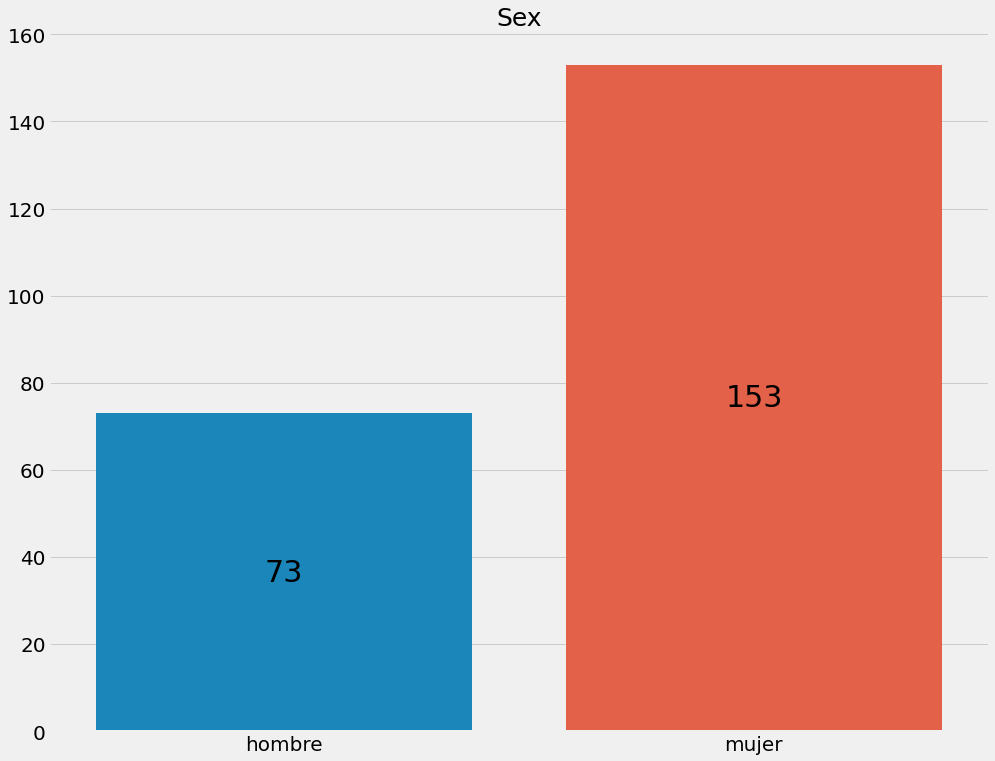

In [37]:
ax = sns.countplot("sexo", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Sex", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

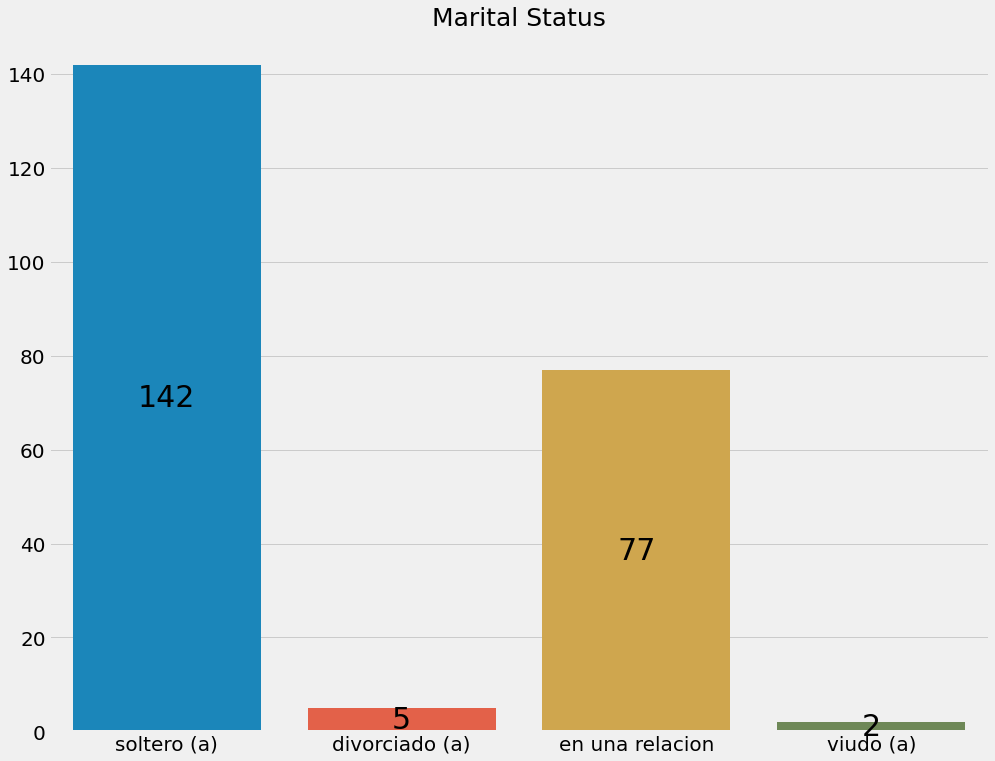

In [38]:
ax = sns.countplot("estado_civil", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Marital Status", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

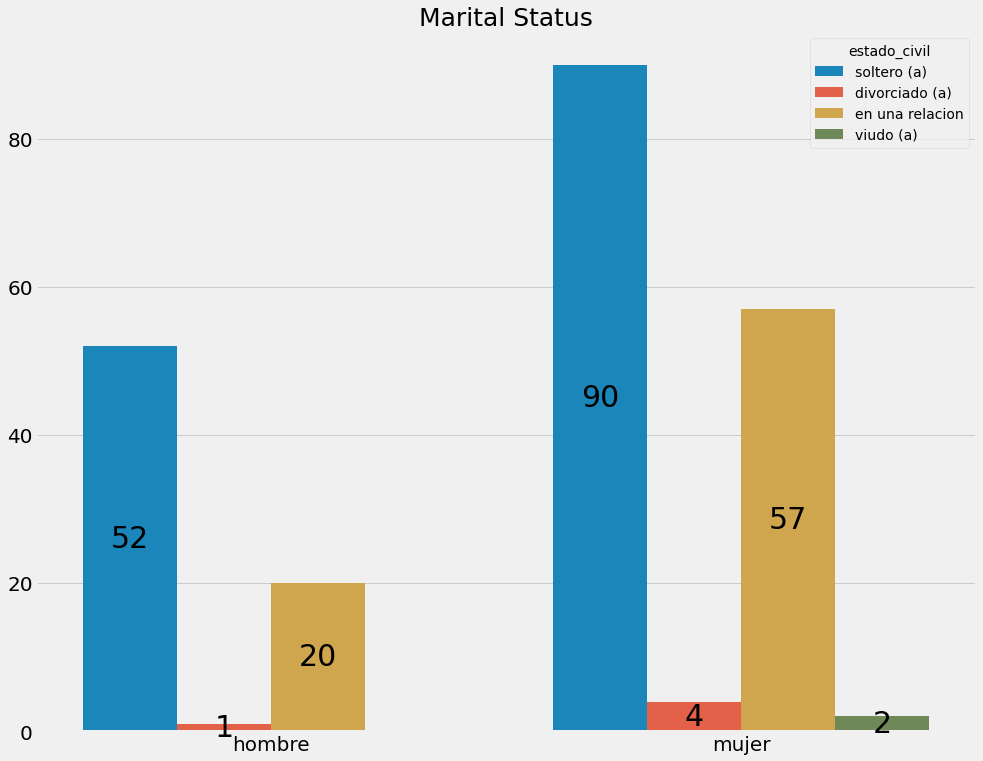

In [39]:
ax = sns.countplot(x = "sexo",hue = "estado_civil", data = cat)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Marital Status", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

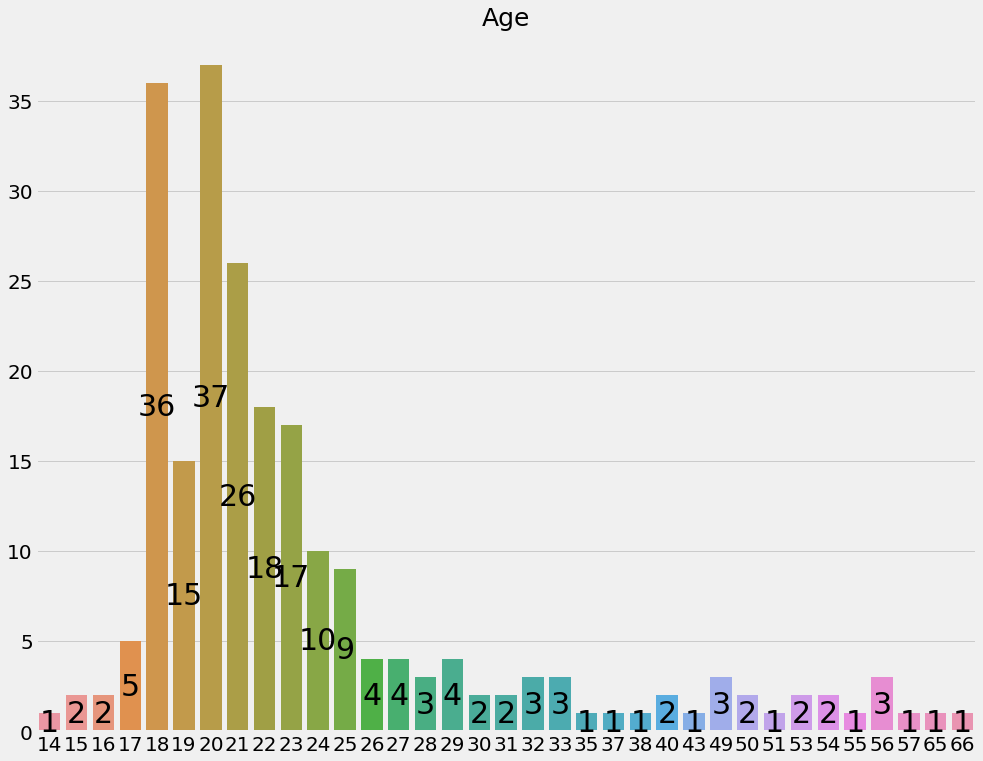

In [40]:
ax = sns.countplot("edad", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Age", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

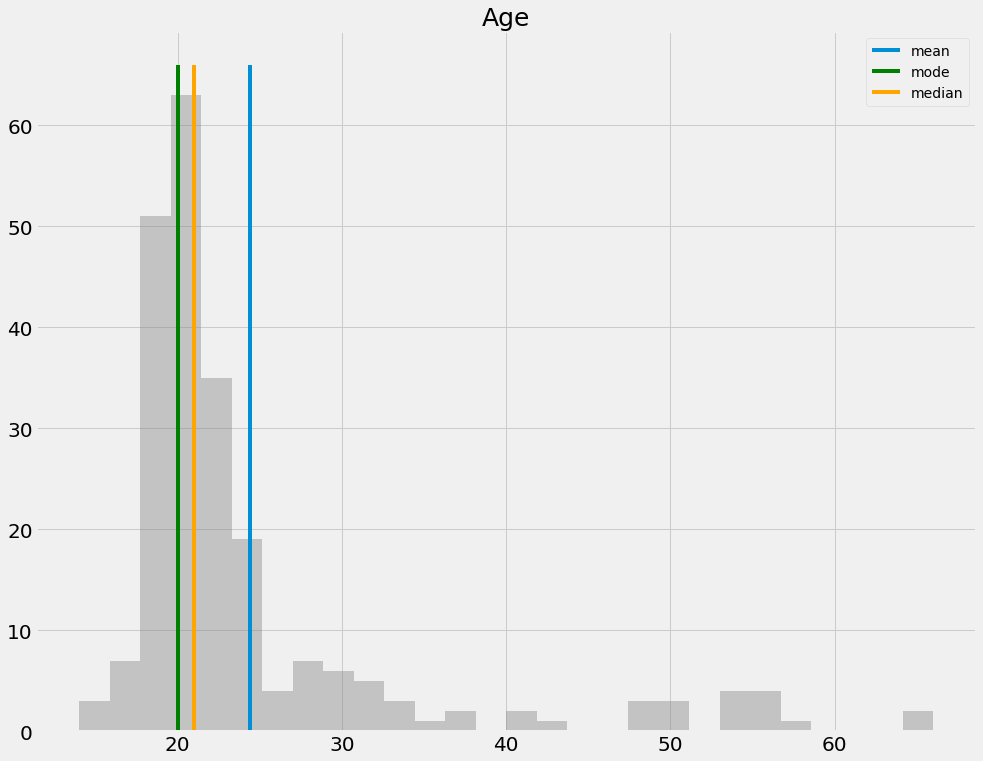

In [41]:
ax = sns.distplot(cat["edad"], norm_hist = False, kde = False, color = "grey" )
plt.title("Age", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.vlines(x = np.mean(cat.edad), ymin = 0, ymax = 66, label = "mean")
plt.vlines(x = cat.edad.value_counts().index[0], ymin = 0, ymax = 66, label = "mode", color = "green")
plt.vlines(x = np.median(cat.edad), ymin = 0, ymax = 66, label = "median", color = "orange")

plt.legend()
plt.show()

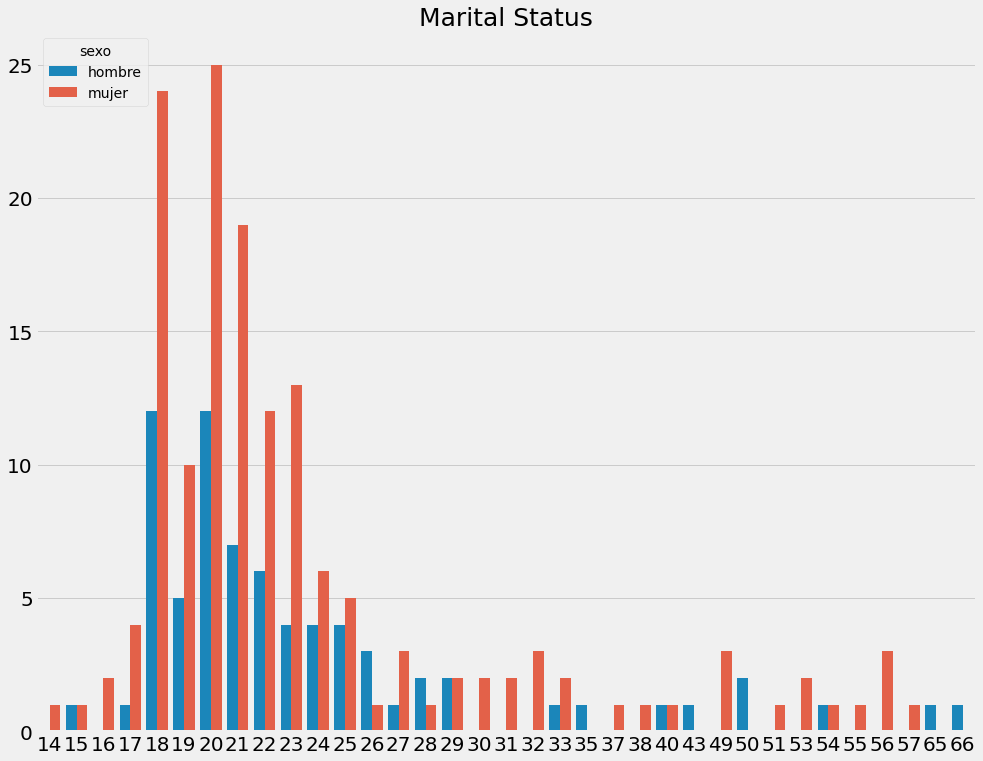

In [42]:
ax = sns.countplot(hue = "sexo",x = "edad", data = cat)
plt.title("Marital Status", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

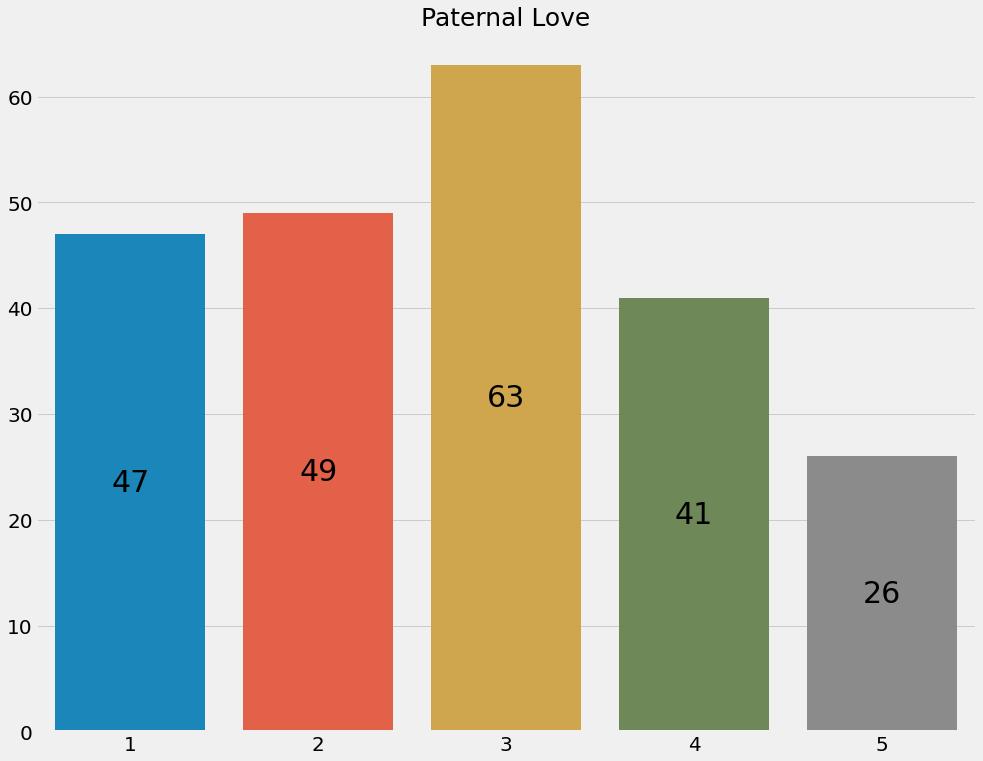

In [43]:
ax = sns.countplot("amor_filial", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Paternal Love", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

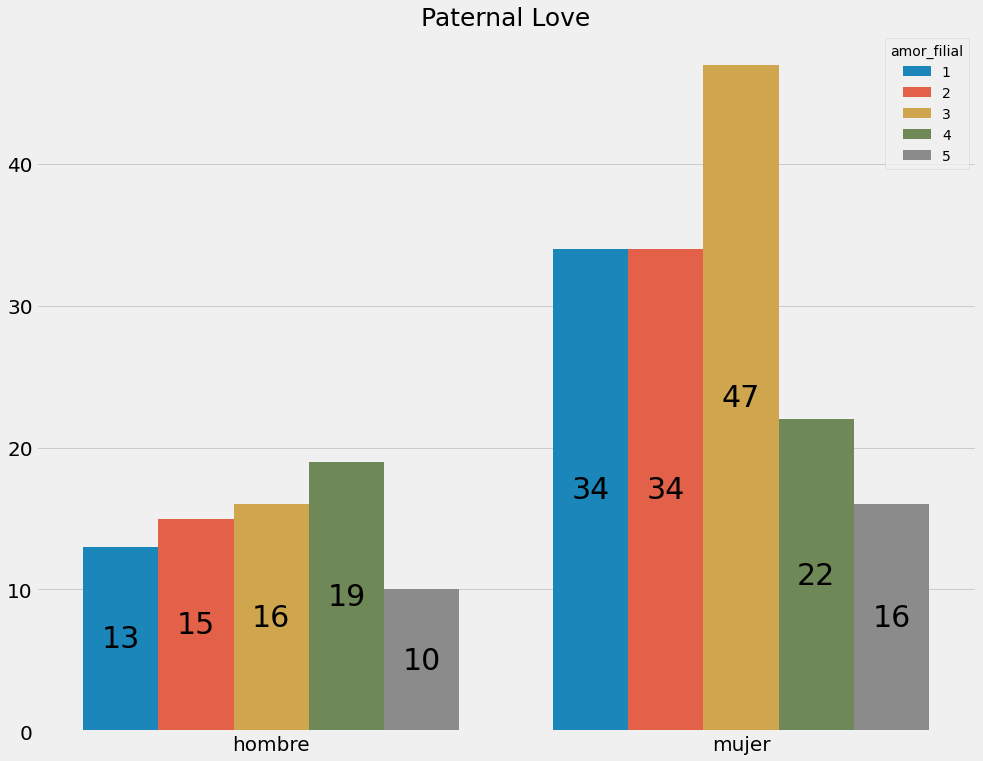

In [44]:
ax = sns.countplot(x = "sexo",hue = "amor_filial", data = cat)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Paternal Love", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

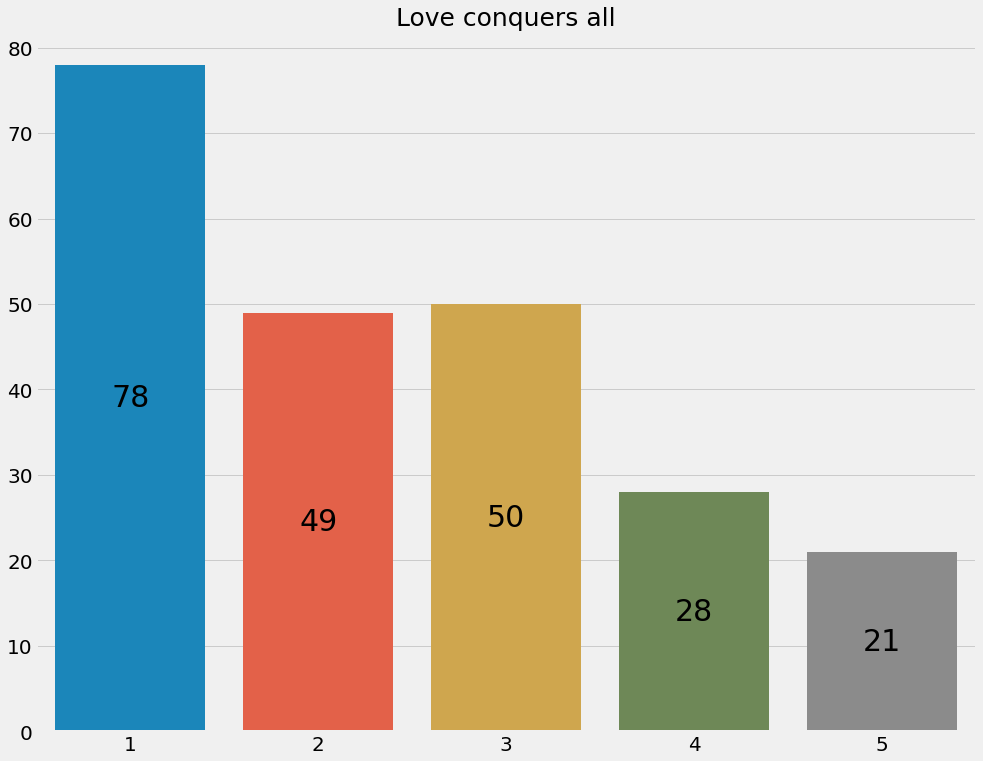

In [45]:
ax = sns.countplot("amor_todo", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Love conquers all", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

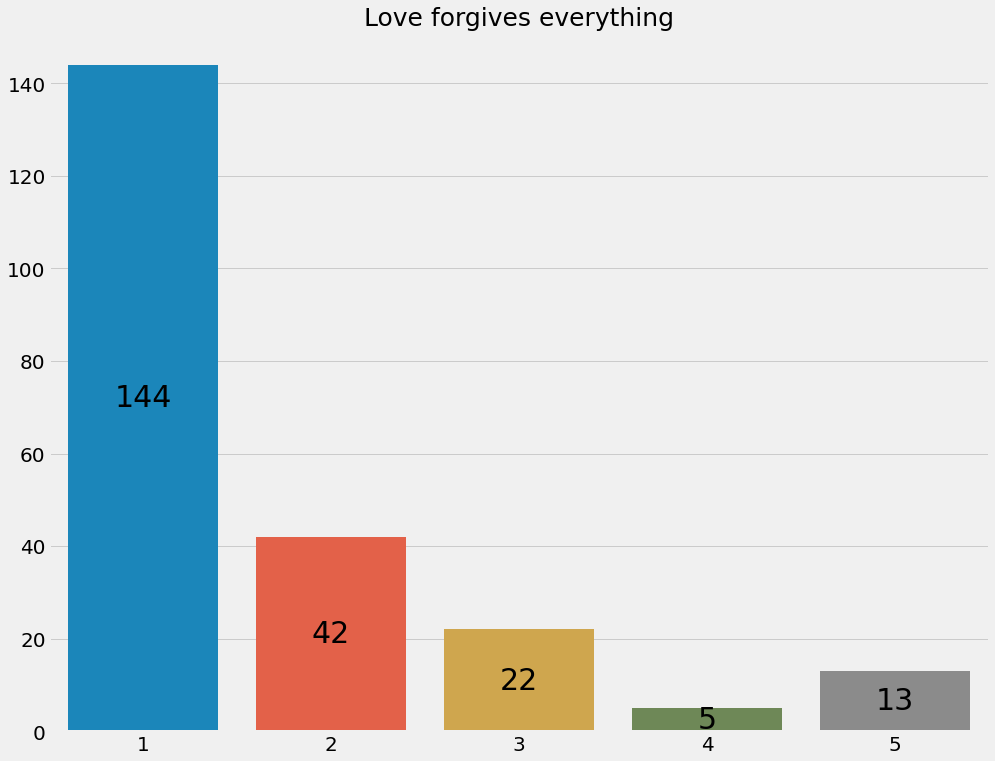

In [46]:
ax = sns.countplot("amor_perdona", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Love forgives everything", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

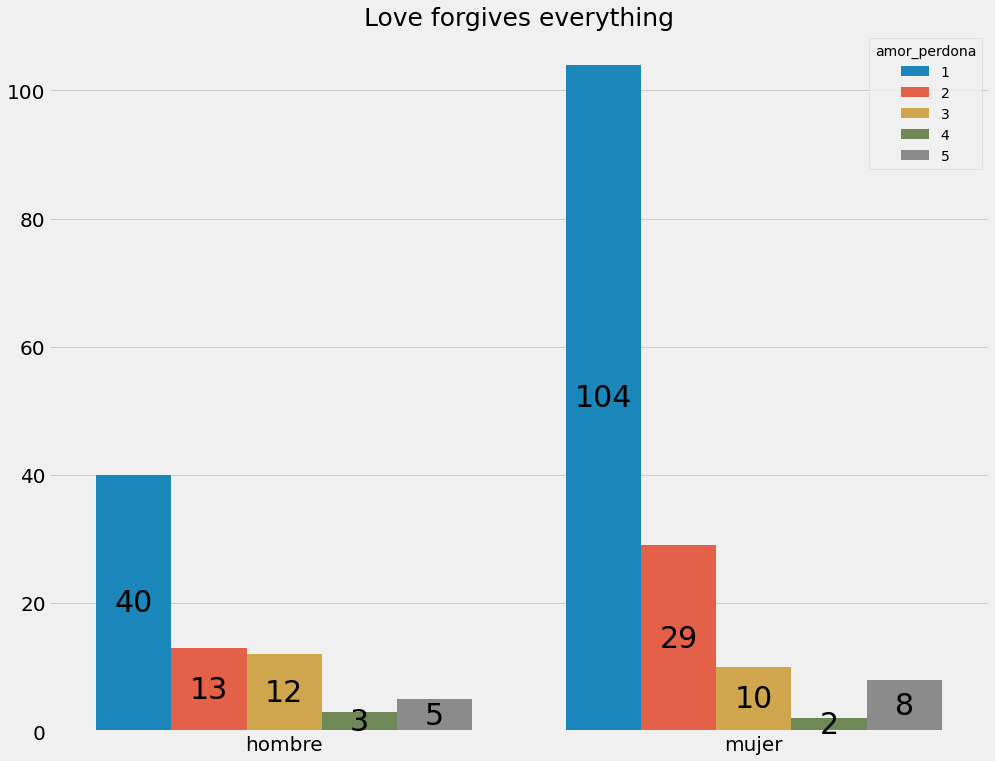

In [47]:
ax = sns.countplot(x = "sexo",hue = "amor_perdona", data = cat)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Love forgives everything", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

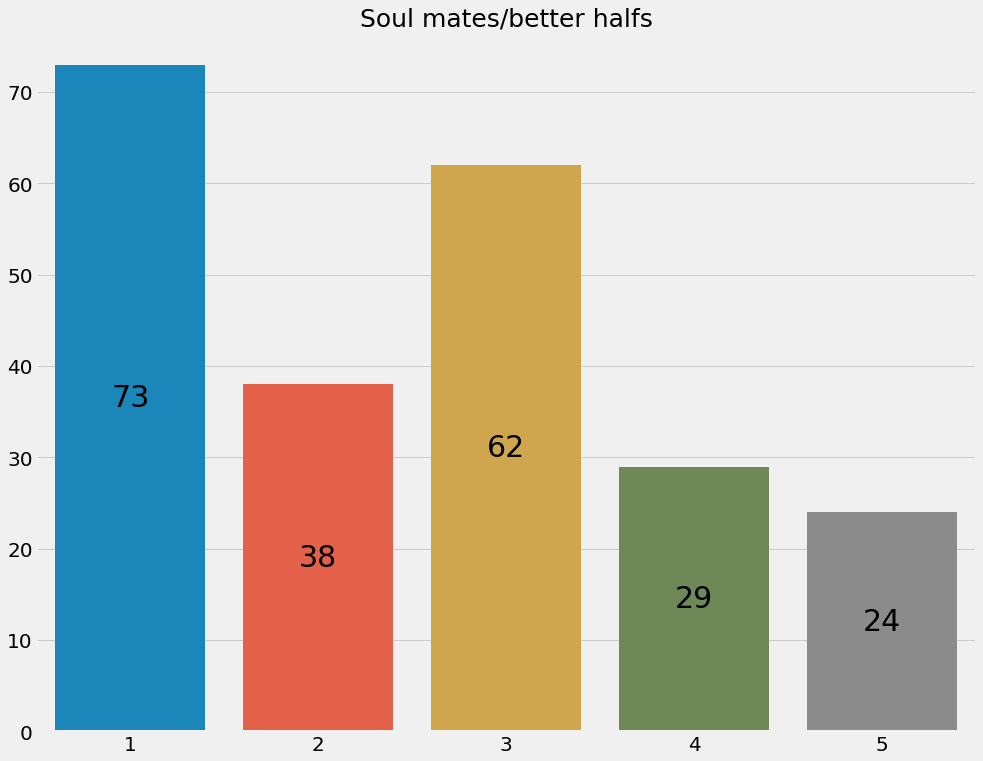

In [48]:
ax = sns.countplot("alma_gemela", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Soul mates/better halfs", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

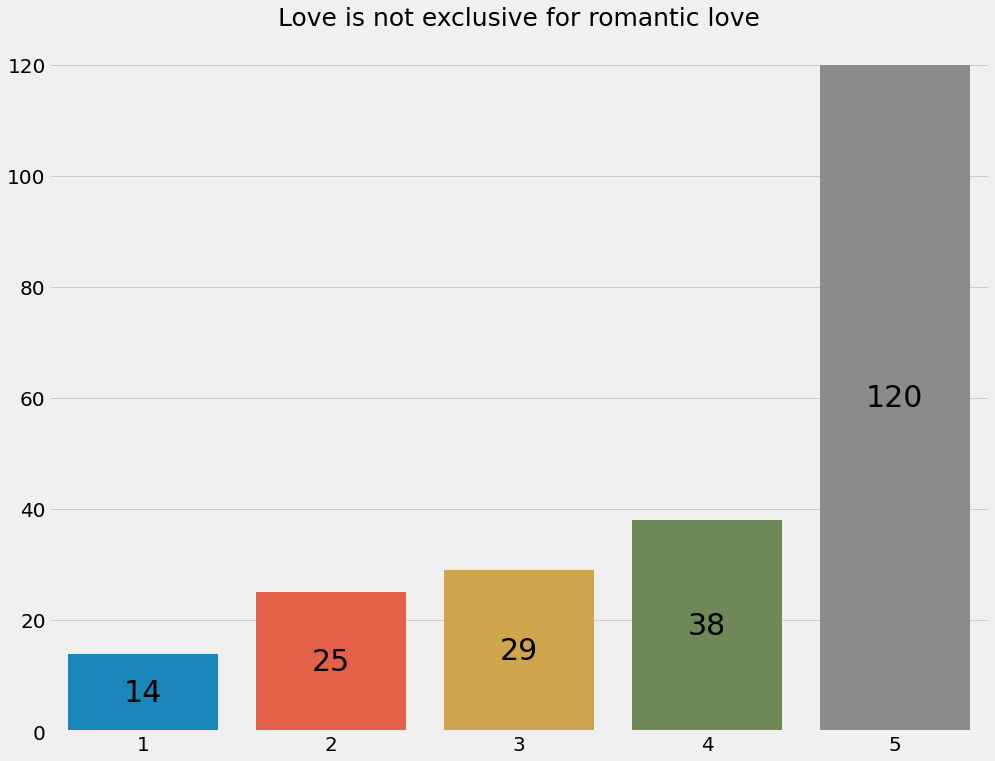

In [49]:
ax = sns.countplot("amor_dif_pareja", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Love is not exclusive for romantic love", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

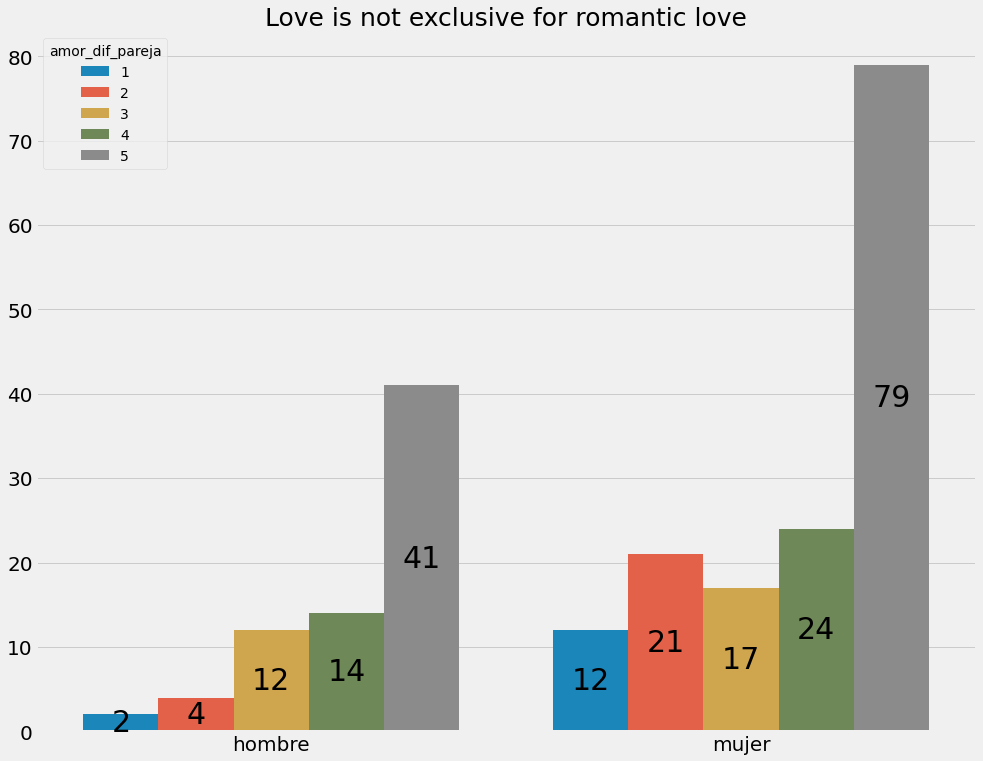

In [50]:
ax = sns.countplot(x = "sexo",hue = "amor_dif_pareja", data = cat)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Love is not exclusive for romantic love", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

## Correlation

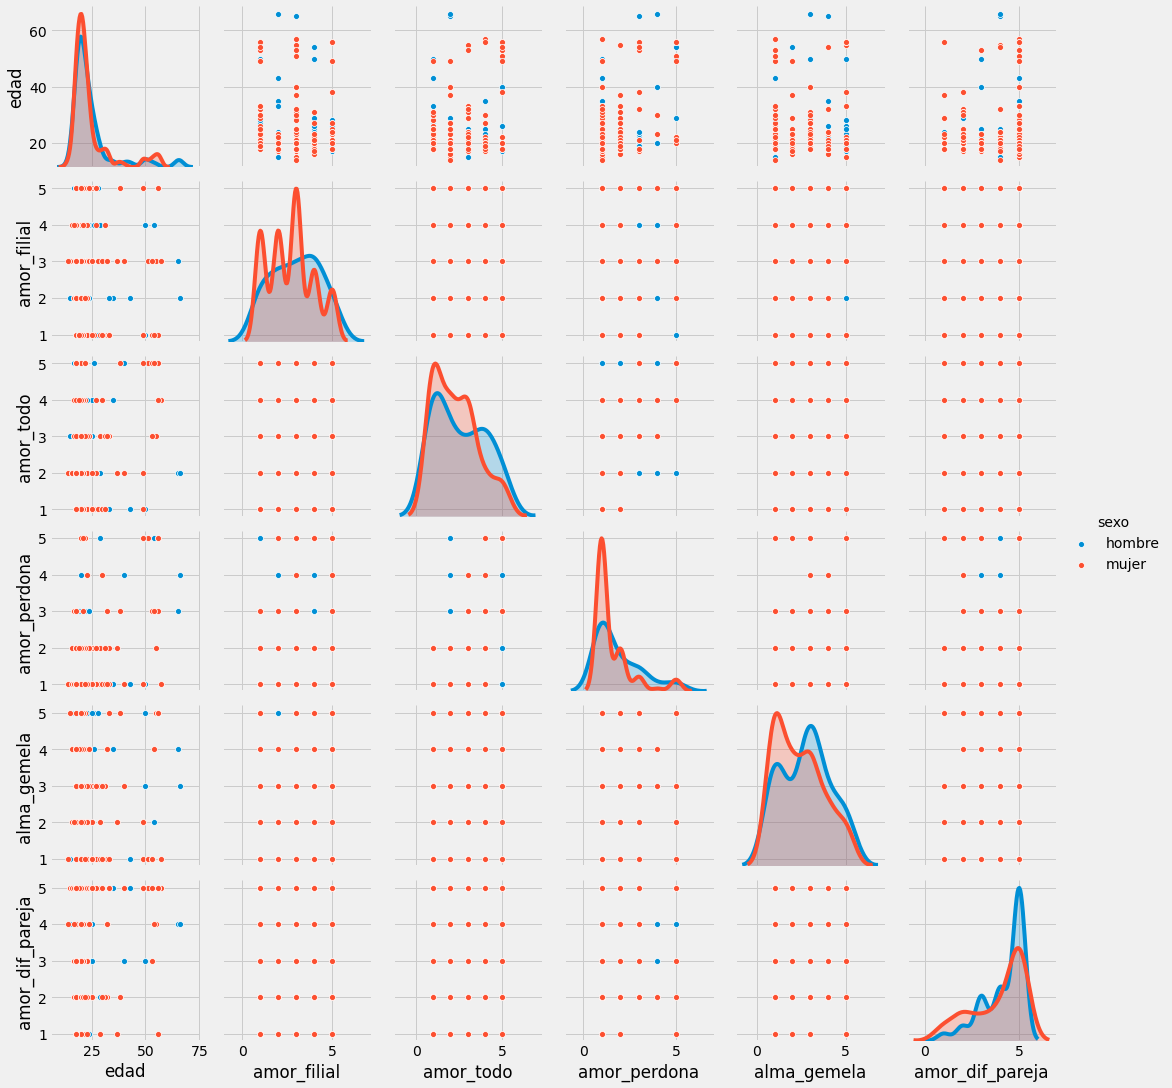

In [51]:
sns.pairplot(cat, hue = "sexo")
plt.show()

In [52]:
cat.iloc[:,2:].corr(method = "kendall")

,edad,amor_filial,amor_todo,amor_perdona,alma_gemela,amor_dif_pareja
edad,1.000000,-0.024567,0.048146,0.141346,-0.000047,0.050489
amor_filial,-0.024567,1.000000,0.195352,0.136685,0.180412,-0.090225
amor_todo,0.048146,0.195352,1.000000,0.514509,0.310624,-0.137593
amor_perdona,0.141346,0.136685,0.514509,1.000000,0.284035,-0.128354
alma_gemela,-0.000047,0.180412,0.310624,0.284035,1.000000,-0.001602
amor_dif_pareja,0.050489,-0.090225,-0.137593,-0.128354,-0.001602,1.000000


## Statistical Inference

- Prueba de proporciones de dos muestras
- Kruscal Wallis
- A lo largo del tiempo vamos dejando de creer que el amor todo lo puede/todo lo perdona?

### Kruskal-Wallis test

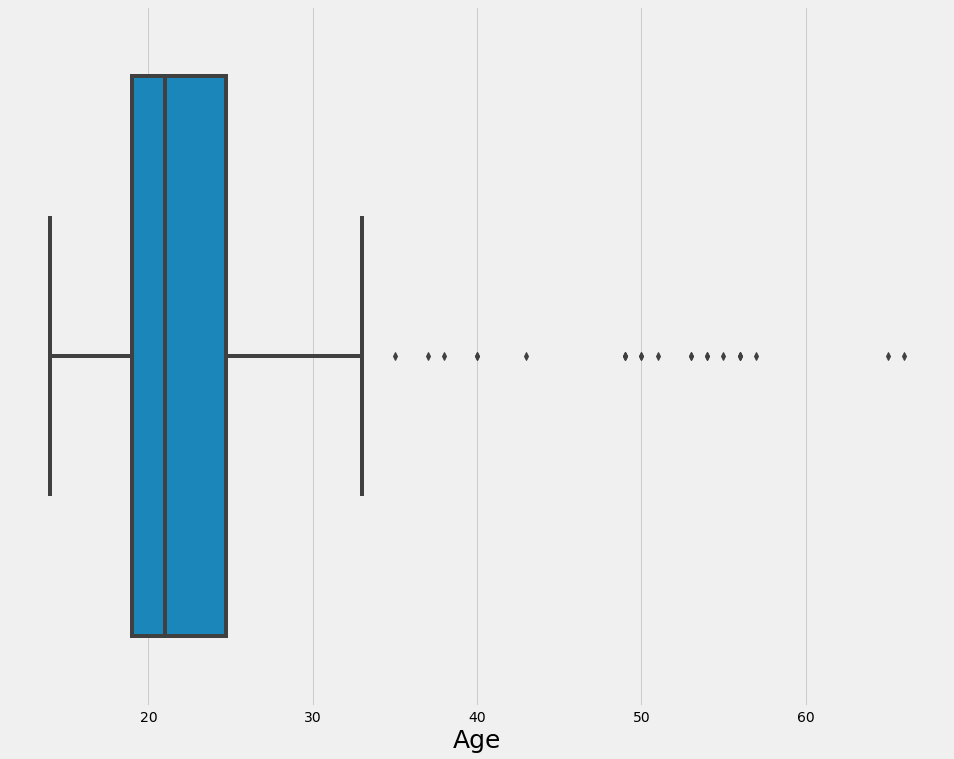

In [109]:
sns.boxplot(cat.edad)
plt.xlabel("Age", fontsize = 25)
plt.show()

In [125]:
def rango(x):
    if x <=20:
        return "<20"
    if x < 25:
        return "21 - 25"
    if x >=30:
        return "30>"

cat["edad_rango"] = cat["edad"].apply(rango)

cat

,sexo,estado_civil,edad,amor_filial,amor_todo,amor_perdona,alma_gemela,amor_dif_pareja,edad_rango
0,hombre,soltero (a),22,3,4,1,4,4,21 - 25
1,mujer,divorciado (a),55,3,3,2,5,4,30>
2,mujer,soltero (a),20,2,2,2,2,5,<20
3,hombre,soltero (a),17,5,5,1,5,3,<20
4,hombre,soltero (a),20,5,1,1,1,3,<20
...,...,...,...,...,...,...,...,...,...
221,hombre,soltero (a),23,1,1,1,3,5,21 - 25
222,mujer,en una relacion,22,2,3,1,1,2,21 - 25
223,mujer,soltero (a),20,1,3,2,5,5,<20
224,mujer,soltero (a),19,1,4,2,4,5,<20


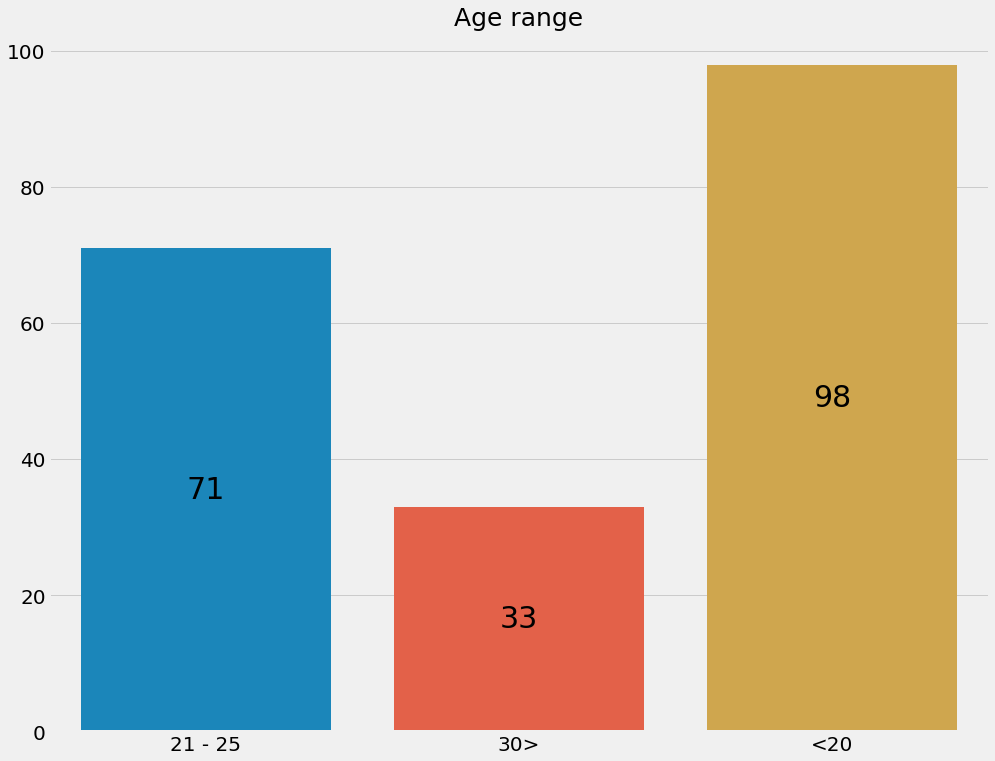

In [128]:
ax = sns.countplot("edad_rango", data = cat)
ax.bar_label(ax.containers[0], size = 30, label_type = "center")
plt.title("Age range", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [141]:
cat.groupby(["edad_rango","estado_civil","alma_gemela"])["alma_gemela"].count()

edad_rango  estado_civil     alma_gemela
21 - 25     en una relacion  1               6
                             2               4
                             3               5
                             4               6
                             5               1
            soltero (a)      1              18
                             2              10
                             3              14
                             4               4
                             5               3
30>         divorciado (a)   1               1
                             2               1
                             3               2
                             5               1
            en una relacion  1               4
                             2               2
                             3               3
                             4               3
                             5               5
            soltero (a)      1               4
                   

In [145]:
base_kruskal = cat[["edad_rango","alma_gemela"]] ; base_kruskal

,edad_rango,alma_gemela
0,21 - 25,4
1,30>,5
2,<20,2
3,<20,5
4,<20,1
...,...,...
221,21 - 25,3
222,21 - 25,1
223,<20,5
224,<20,4


In [155]:
less20 = base_kruskal[base_kruskal["edad_rango"] == "<20"]["alma_gemela"].tolist()
_21_25 = base_kruskal[base_kruskal["edad_rango"] == "21 - 25"]["alma_gemela"].tolist()
more30 = base_kruskal[base_kruskal["edad_rango"] == "30>"]["alma_gemela"].tolist()

In [150]:
stats.jarque_bera(less20)

Jarque_beraResult(statistic=5.8179613537340735, pvalue=0.05453128655112571)

In [153]:
stats.jarque_bera(_21_25)

Jarque_beraResult(statistic=4.4493583689626695, pvalue=0.10810209390167391)

In [156]:
stats.jarque_bera(more30)

Jarque_beraResult(statistic=2.844837755055268, pvalue=0.24113004685418926)

In [157]:
stats.levene(less20,_21_25,more30)

LeveneResult(statistic=1.0776791716333827, pvalue=0.34236261351043484)

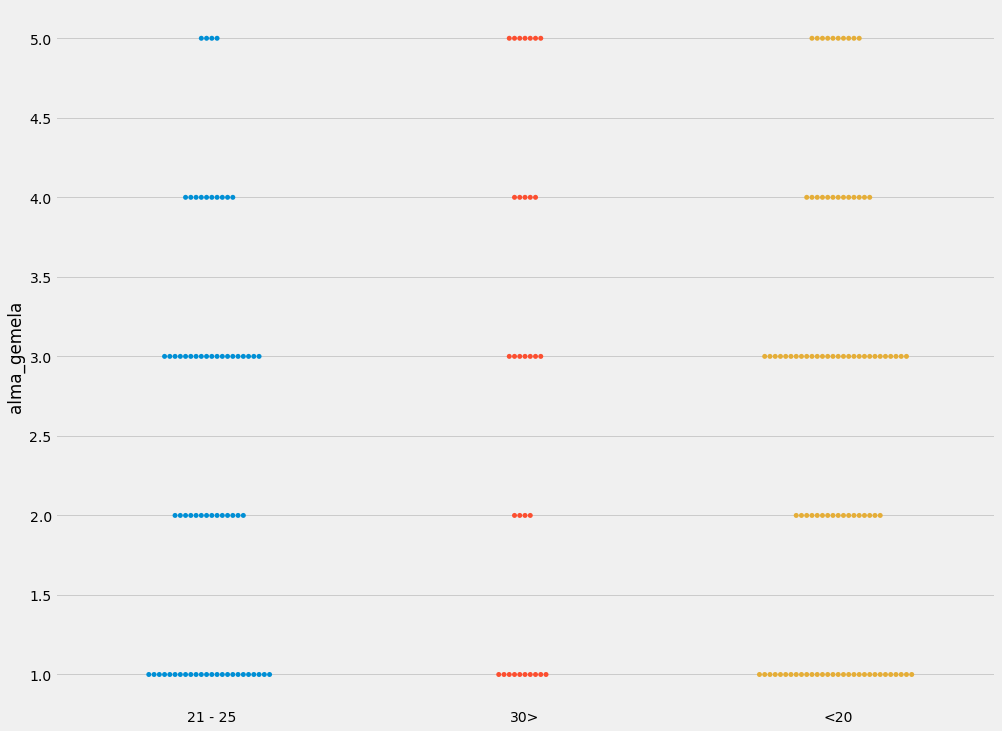

In [168]:
sns.swarmplot(y = "alma_gemela", x = "edad_rango",data = base_kruskal)
plt.xlabel("") 
plt.show()

In [158]:
stats.kruskal(less20,_21_25,more30)

KruskalResult(statistic=2.125031361704722, pvalue=0.34558533346189446)

In [161]:
f_oneway(less20,_21_25,more30)

F_onewayResult(statistic=1.3903041582261821, pvalue=0.2514074352925068)

### The more we mature, the less we believe in love? 

In [173]:
base_serie = cat[["edad","amor_perdona","amor_todo","alma_gemela"]].groupby("edad").median() ; base_serie

,amor_perdona,amor_todo,alma_gemela
edad,,,
14,1.0,2.0,1.0
15,1.0,2.5,3.0
16,1.5,2.0,3.0
17,1.0,3.0,2.0
18,1.0,2.5,3.0
19,1.0,2.0,2.0
20,1.0,2.0,2.0
21,1.0,2.0,2.0
22,1.0,3.0,2.5


<AxesSubplot:xlabel='edad'>

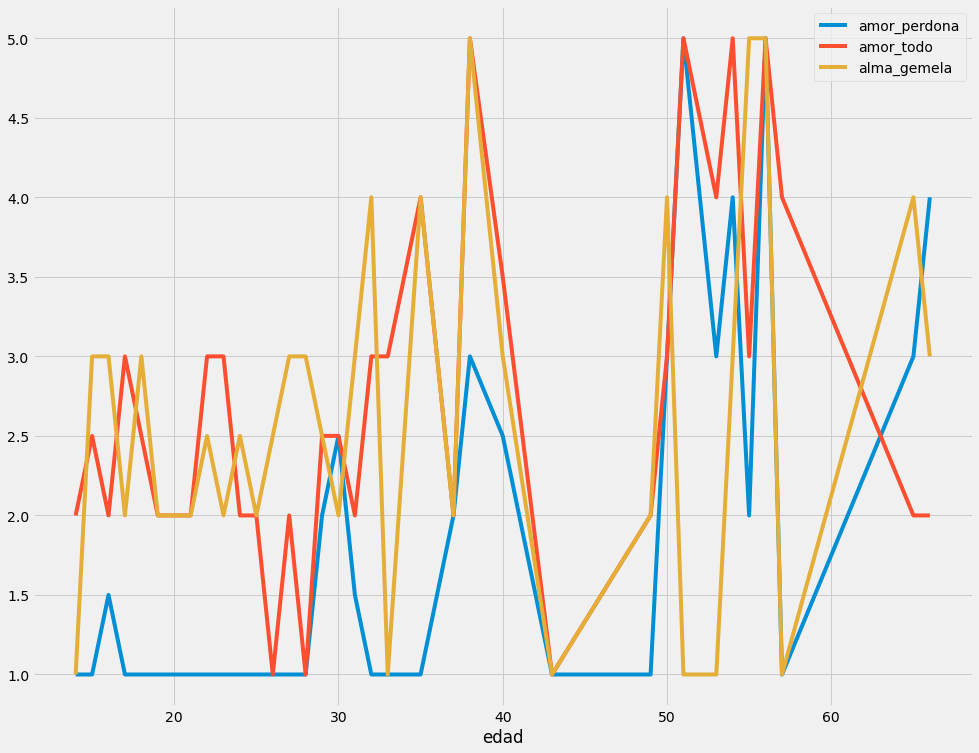

In [182]:
sns.lineplot(data = base_serie, dashes = False ,err_style = "bars", ci = 68)

### Contingency tables

In [53]:
info_chi(cat.sexo, cat.amor_todo)

amor_todo,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
sexo,,,,,
hombre,25,13,11,15,9
mujer,53,36,39,13,12


Chi-statistic: 10.037818387863284 

 P-value 0.0398 

 Df 4 

 Expected values [[25.19469027 15.82743363 16.15044248  9.04424779  6.78318584]
 [52.80530973 33.17256637 33.84955752 18.95575221 14.21681416]] 


Crammer's V: 0.21074896348503006


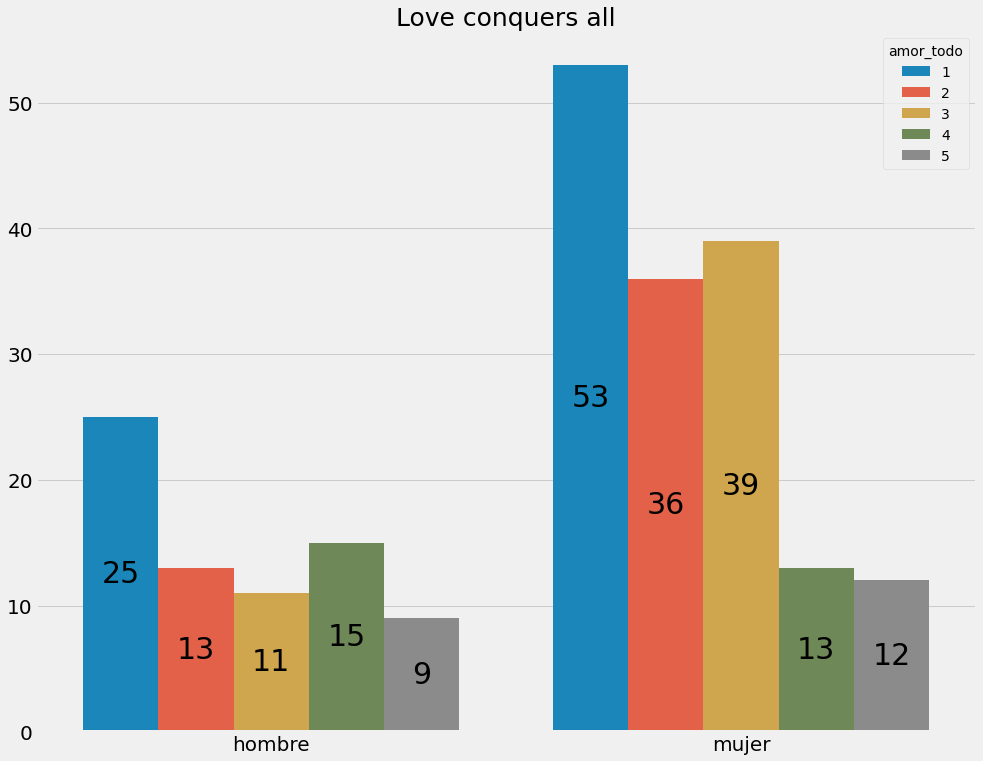

In [54]:
ax = sns.countplot(x = "sexo",hue = "amor_todo", data = cat)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Love conquers all", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [55]:
info_chi(cat.sexo, cat.alma_gemela)

alma_gemela,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
sexo,,,,,
hombre,20,7,26,10,10
mujer,53,31,36,19,14


Chi-statistic: 7.808184880781225 

 P-value 0.0989 

 Df 4 

 Expected values [[23.57964602 12.27433628 20.02654867  9.36725664  7.75221239]
 [49.42035398 25.72566372 41.97345133 19.63274336 16.24778761]] 


Crammer's V: 0.18587493274491257


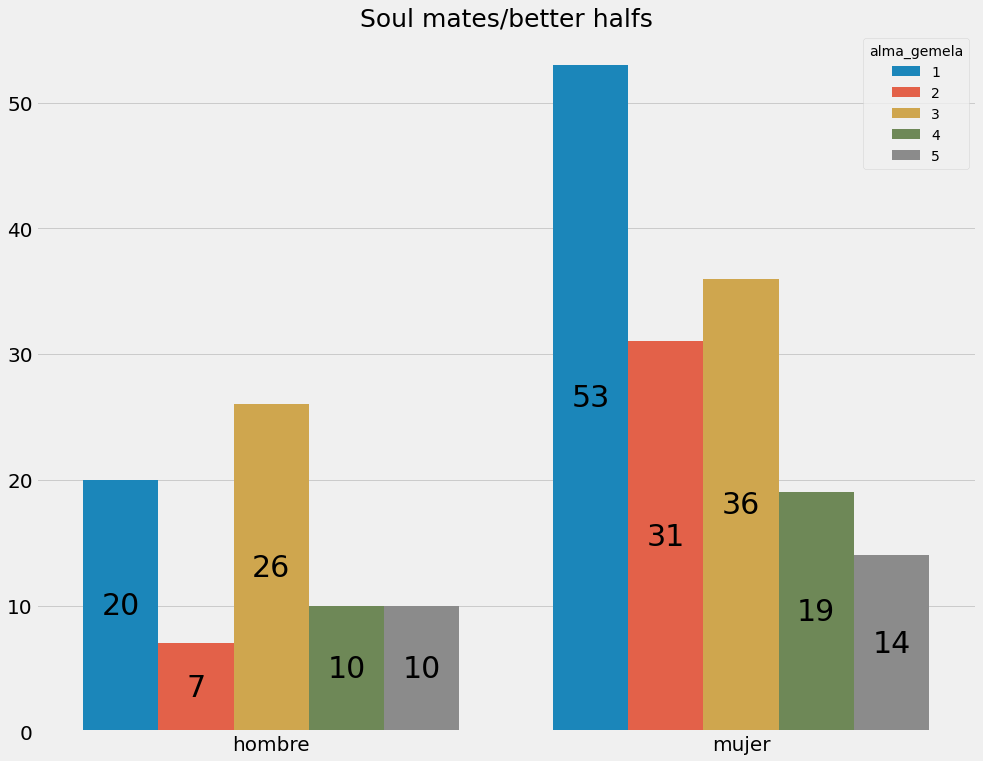

In [56]:
ax = sns.countplot(x = "sexo",hue = "alma_gemela", data = cat)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Soul mates/better halfs", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

New table

In [57]:
single_relation = cat[(cat["estado_civil"] == "soltero (a)") | (cat["estado_civil"] == "en una relacion")] ; single_relation

,sexo,estado_civil,edad,amor_filial,amor_todo,amor_perdona,alma_gemela,amor_dif_pareja
0,hombre,soltero (a),22,3,4,1,4,4
2,mujer,soltero (a),20,2,2,2,2,5
3,hombre,soltero (a),17,5,5,1,5,3
4,hombre,soltero (a),20,5,1,1,1,3
5,mujer,soltero (a),17,2,4,3,2,2
...,...,...,...,...,...,...,...,...
221,hombre,soltero (a),23,1,1,1,3,5
222,mujer,en una relacion,22,2,3,1,1,2
223,mujer,soltero (a),20,1,3,2,5,5
224,mujer,soltero (a),19,1,4,2,4,5


In [58]:
single_relation_ = pd.concat([single_relation.iloc[:,:2],single_relation.iloc[:,3:].replace({1:2,5:4})], axis = 1) ; single_relation_

,sexo,estado_civil,amor_filial,amor_todo,amor_perdona,alma_gemela,amor_dif_pareja
0,hombre,soltero (a),3,4,2,4,4
2,mujer,soltero (a),2,2,2,2,4
3,hombre,soltero (a),4,4,2,4,3
4,hombre,soltero (a),4,2,2,2,3
5,mujer,soltero (a),2,4,3,2,2
...,...,...,...,...,...,...,...
221,hombre,soltero (a),2,2,2,3,4
222,mujer,en una relacion,2,3,2,2,2
223,mujer,soltero (a),2,3,2,4,4
224,mujer,soltero (a),2,4,2,4,4


In [59]:
info_chi(single_relation_.estado_civil, single_relation_.amor_todo)

amor_todo,Disagree,Neutral,Agree
estado_civil,,,
en una relacion,42,18,17
soltero (a),82,31,29


Chi-statistic: 0.20879608825688445 

 P-value 0.9009 

 Df 2 

 Expected values [[43.59817352 17.2283105  16.17351598]
 [80.40182648 31.7716895  29.82648402]] 


Crammer's V: 0.03087728608044328


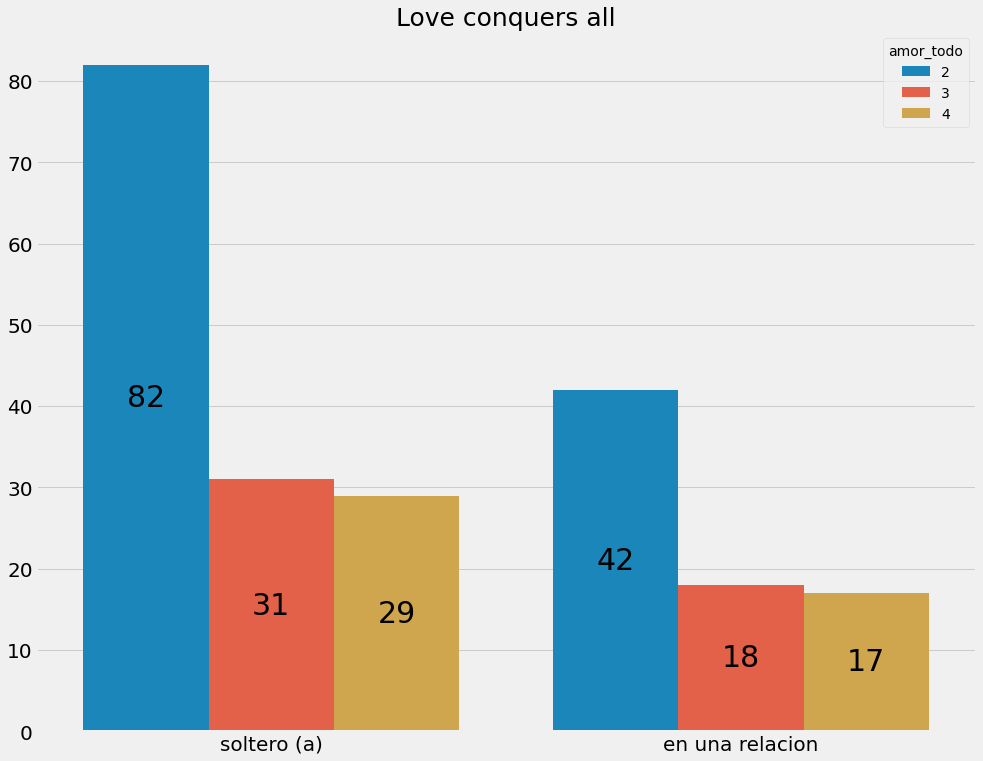

In [60]:
ax = sns.countplot(x = "estado_civil",hue = "amor_todo", data = single_relation_)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Love conquers all", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [61]:
info_chi(single_relation_.estado_civil, single_relation_.amor_perdona)

amor_perdona,Disagree,Neutral,Agree
estado_civil,,,
en una relacion,62,6,9
soltero (a),120,15,7


Chi-statistic: 3.617057175721663 

 P-value 0.1639 

 Df 2 

 Expected values [[ 63.99086758   7.38356164   5.62557078]
 [118.00913242  13.61643836  10.37442922]] 


Crammer's V: 0.12851553529248688


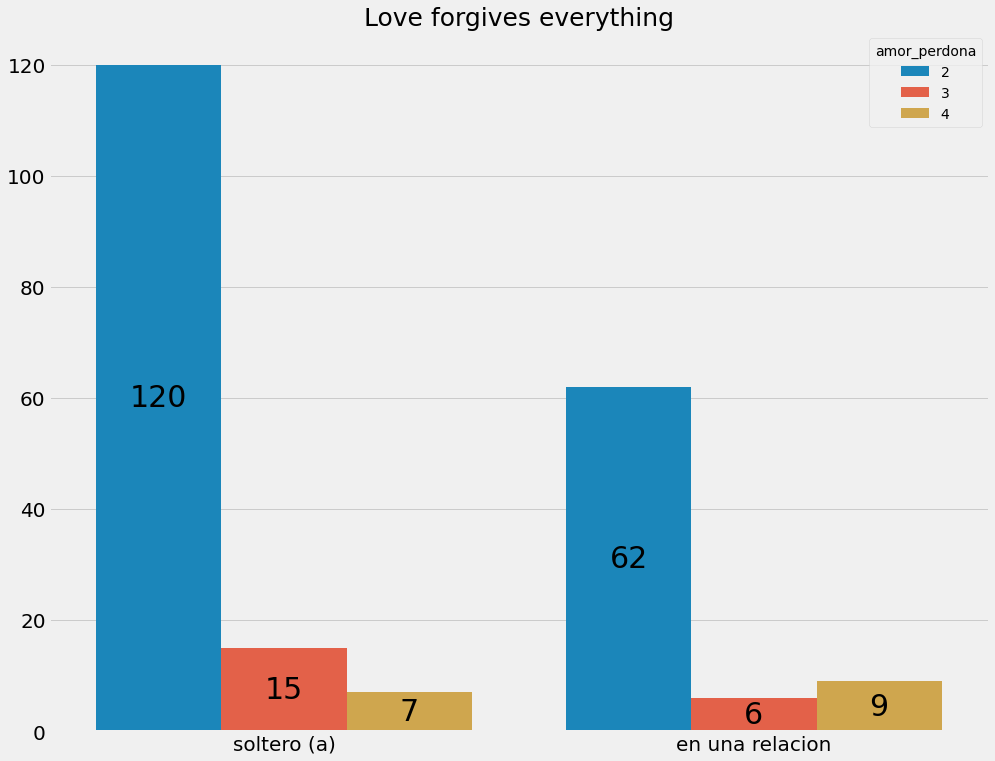

In [62]:
ax = sns.countplot(x = "estado_civil",hue = "amor_perdona", data = single_relation_)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Love forgives everything", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [63]:
info_chi(single_relation_.estado_civil, single_relation_.alma_gemela)

alma_gemela,Disagree,Neutral,Agree
estado_civil,,,
en una relacion,32,23,22
soltero (a),76,37,29


Chi-statistic: 3.137532234404646 

 P-value 0.2083 

 Df 2 

 Expected values [[37.97260274 21.09589041 17.93150685]
 [70.02739726 38.90410959 33.06849315]] 


Crammer's V: 0.11969390630824592


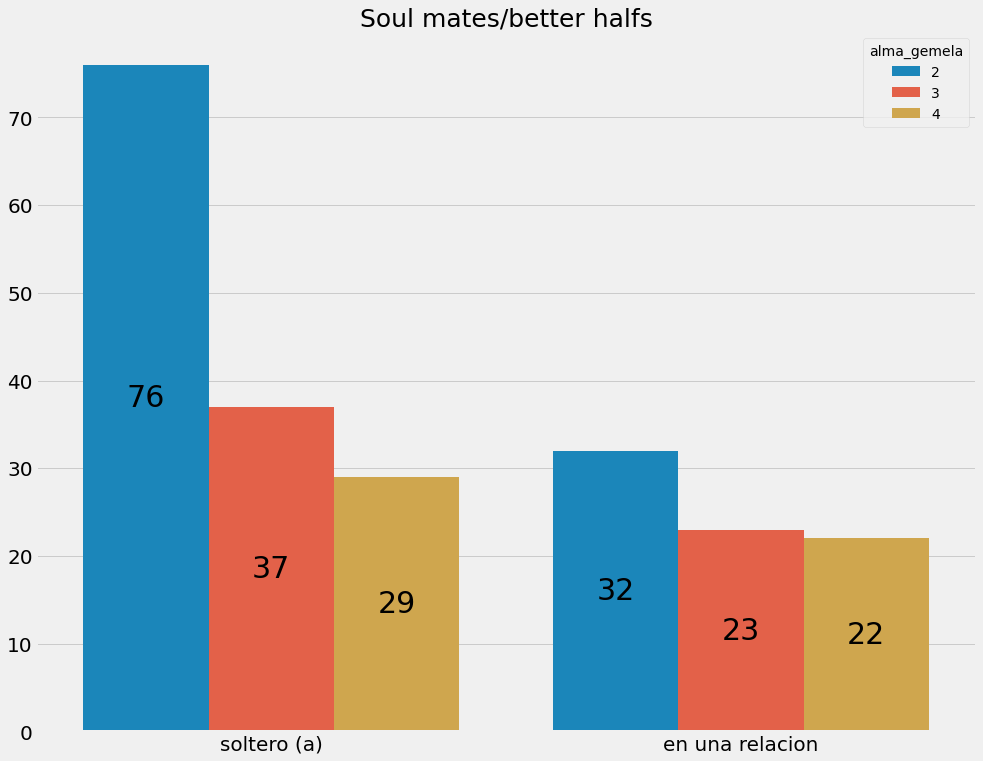

In [64]:
ax = sns.countplot(x = "estado_civil",hue = "alma_gemela", data = single_relation_)

for container in ax.containers:
    ax.bar_label(container, size = 30, label_type = "center")

plt.title("Soul mates/better halfs", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

## Machine Learning

In [65]:
Female1 = [0,1,1,1,1,5]
Female2 = [0,1,5,4,4,5]
Male1 = [1,1,1,1,1,5]
Male2 = [1,1,3,1,4,5]
Me = [1,1,3,1,2,5]

friends = pd.DataFrame([Female1, Female2,Male1,Male2,Me],columns = ["sexo","amor_filial","amor_todo","amor_perdona","alma_gemela","amor_dif_pareja"])

Xtest = friends.loc[:, (friends.columns != 'sexo') & (friends.columns != 'estado_civil') & (friends.columns != 'edad')]
Ytest = friends.loc[:, friends.columns == 'sexo']

### Logistic Regression

In [66]:
cat

,sexo,estado_civil,edad,amor_filial,amor_todo,amor_perdona,alma_gemela,amor_dif_pareja
0,hombre,soltero (a),22,3,4,1,4,4
1,mujer,divorciado (a),55,3,3,2,5,4
2,mujer,soltero (a),20,2,2,2,2,5
3,hombre,soltero (a),17,5,5,1,5,3
4,hombre,soltero (a),20,5,1,1,1,3
...,...,...,...,...,...,...,...,...
221,hombre,soltero (a),23,1,1,1,3,5
222,mujer,en una relacion,22,2,3,1,1,2
223,mujer,soltero (a),20,1,3,2,5,5
224,mujer,soltero (a),19,1,4,2,4,5


In [67]:
X = cat.loc[:, (cat.columns != 'sexo') & (cat.columns != 'estado_civil') & (cat.columns != 'edad')]
Y = cat.loc[:, cat.columns == 'sexo'].replace({"hombre":1,"mujer":0})

In [68]:
log = LogisticRegression()
log.fit(X,Y.values.ravel())

LogisticRegression()

In [69]:
y_pred = log.predict(Xtest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(Xtest, Ytest)))

Accuracy of logistic regression classifier on test set: 0.40


In [70]:
y_pred

array([0, 0, 0, 0, 0], dtype=int64)

In [71]:
confusion_matrix_ = confusion_matrix(Ytest, y_pred)
print(confusion_matrix_)

[[2 0]
 [3 0]]


In [79]:
print(classification_report(Ytest, y_pred, zero_division = True))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         2
           5       0.00      1.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.62      0.50      0.17         5
weighted avg       0.80      0.40      0.27         5



### Naive Bayes Classifier

In [73]:
Xtest = friends.loc[:, (friends.columns != 'sexo') & (friends.columns != 'alma_gemela') ]
Ytest = friends.loc[:, friends.columns == 'alma_gemela']

X = cat.loc[:, (cat.columns != 'sexo') & (cat.columns != 'alma_gemela')& (cat.columns != 'estado_civil') & (cat.columns != 'edad')]
Y = cat.loc[:, cat.columns == 'alma_gemela']

In [74]:
bayes = GaussianNB()
bayes.fit(X, Y.values.ravel())

GaussianNB()

In [75]:
y_pred  =  bayes.predict(Xtest)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(bayes.score(Xtest, Ytest)))

Accuracy of logistic regression classifier on test set: 0.40


In [76]:
y_pred

array([1, 5, 1, 1, 1], dtype=int64)

In [77]:
confusion_matrix = confusion_matrix(Ytest, y_pred)
print(confusion_matrix)

[[2 0 0 0]
 [1 0 0 0]
 [1 0 0 1]
 [0 0 0 0]]


In [80]:
print(classification_report(Ytest, y_pred, zero_division = True))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         2
           5       0.00      1.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.62      0.50      0.17         5
weighted avg       0.80      0.40      0.27         5



### Random Forest

In [93]:
Xtest = friends.loc[:, (friends.columns != 'sexo') & (friends.columns != 'alma_gemela') ]
Ytest = friends.loc[:, friends.columns == 'alma_gemela']

X = cat.loc[:, (cat.columns != 'sexo') & (cat.columns != 'alma_gemela')& (cat.columns != 'estado_civil') & (cat.columns != 'edad')]
Y = cat.loc[:, cat.columns == 'alma_gemela']

In [94]:
forest=RandomForestClassifier(n_estimators=100)

In [95]:
forest.fit(X,Y.values.ravel())

RandomForestClassifier()

In [96]:
y_pred  =  forest.predict(Xtest)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(forest.score(Xtest, Ytest)))

Accuracy of logistic regression classifier on test set: 0.60


In [97]:
y_pred

array([1, 5, 1, 2, 2], dtype=int64)

In [98]:
confusion_matrix = confusion_matrix(Ytest, y_pred)
print(confusion_matrix)

[[2 0 0 0]
 [0 1 0 0]
 [0 1 0 1]
 [0 0 0 0]]


In [99]:
print(classification_report(Ytest, y_pred, zero_division = True))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         1
           4       1.00      0.00      0.00         2
           5       0.00      1.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.62      0.75      0.42         5
weighted avg       0.90      0.60      0.53         5



## Text Analysis

Coming soon...